This notebook compares the number of monthly 1x1 observations for the different USV sampling experiments and SOCAT.

This notebook was created by Thea Hatlen Heimdal.

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
%run _Val_Mapping.ipynb #supporting file with functions

### Bring in sampling masks for the different experiments

In [2]:
mask_sail5 = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_5.nc")
mask_sail5_5x_winter = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_5_winter.nc")
mask_sail10 = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_10.nc")
mask_sail10_shifted = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_10_shifted.nc")
mask_sail10_mult_12 = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_10_mult_12.nc")
mask_sail10_mult_12_winter = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_10_mult_12_winter.nc")
mask_zigzag_5 = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_zigzag_5_x12.nc")
mask_zigzag_5_winter = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_zigzag_5_x12_winter.nc")
mask_zigzag_10 = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_zigzag_10.nc")
mask_zigzag_10_winter = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_zigzag_10_winter.nc")

### Bar plots for yearly USV observations

In [3]:
# groupby year, then count all points with data, and sum to get the total for each year
count2 = mask_sail5.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count3 = mask_sail5_5x_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count4 = mask_sail10.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count5 = mask_sail10_shifted.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count6 = mask_sail10_mult_12.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count7 = mask_sail10_mult_12_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count8 = mask_zigzag_5.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count9 = mask_zigzag_5_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count10 = mask_zigzag_10.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])
count11 = mask_zigzag_10_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.year').count().sum(['ylat','xlon'])

In [4]:
# put data into a dataframe to use the histogram feature
df3 = pd.DataFrame(count2, index=count2.year,columns=['Saildrone5'])
df4 = pd.DataFrame(count3, index=count2.year,columns=['Saildrone5_5x_winter'])
df5 = pd.DataFrame(count4, index=count2.year,columns=['Saildrone10'])
df6 = pd.DataFrame(count5, index=count2.year,columns=['Saildrone10_shifted'])
df7 = pd.DataFrame(count6, index=count2.year,columns=['Saildrone10_mult_12'])
df8 = pd.DataFrame(count7, index=count2.year,columns=['Saildrone10_mult_12_winter'])
df9 = pd.DataFrame(count8, index=count2.year,columns=['mask_zigzag_5'])
df10 = pd.DataFrame(count9, index=count2.year,columns=['mask_zigzag_5_winter'])
df11 = pd.DataFrame(count10, index=count2.year,columns=['mask_zigzag_10'])
df12 = pd.DataFrame(count11, index=count2.year,columns=['mask_zigzag_10_winter'])

# combine into one dataframe
df3['Saildrone5_5x_winter'] =df4
df3['Saildrone10'] = df5
df3['Saildrone10_shifted'] = df6
df3['Saildrone10_mult_12'] =df7
df3['Saildrone10_mult_12_winter'] =df8
df3['mask_zigzag_5'] =df9
df3['mask_zigzag_5_winter'] =df10
df3['mask_zigzag_10'] =df11
df3['mask_zigzag_10_winter'] =df12

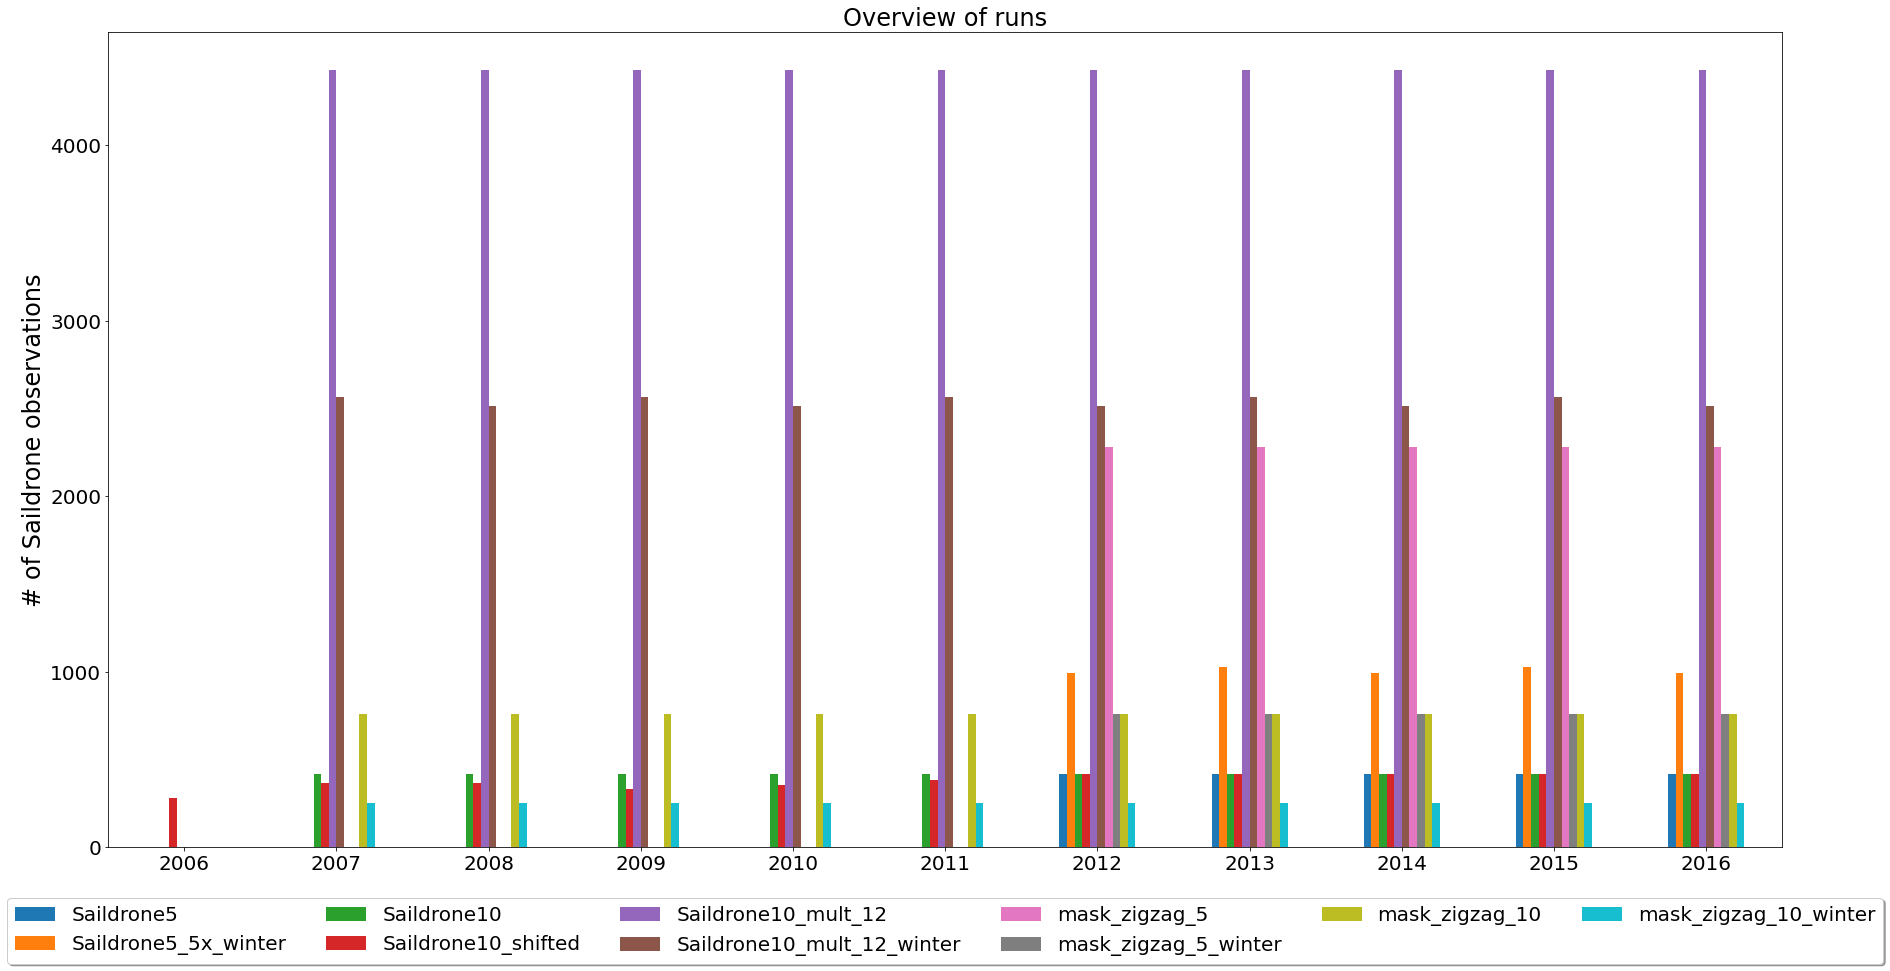

In [6]:
plot = df3.plot(kind='bar', figsize=(30,15))
plot.set_xticklabels(df3.index, rotation=360)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel(f'# of Saildrone observations', fontsize = 24);
plt.xlabel("")
plt.title('Overview of runs', fontsize= 24)
plt.legend(fontsize="14", loc ="upper left")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=6, fontsize= 20)

### Bar plots for monthly USV observations

In [7]:
# groupby month
count2_month = mask_sail5.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count3_month = mask_sail5_5x_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count4_month = mask_sail10.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count5_month = mask_sail10_shifted.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count6_month = mask_sail10_mult_12.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count7_month = mask_sail10_mult_12_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count8_month = mask_zigzag_5.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count9_month = mask_zigzag_5_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count10_month = mask_zigzag_10.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])
count11_month = mask_zigzag_10_winter.sail_mask.sel(time=slice("2006-01-01","2016-12-31")).groupby('time.month').count().sum(['ylat','xlon'])

In [9]:
# put data into a dataframe to use the histogram feature
df3_month = pd.DataFrame(count2_month, index=count2_month.month,columns=['Saildrone5'])
df4_month = pd.DataFrame(count3_month, index=count2_month.month,columns=['Saildrone5_5x_winter'])
df5_month = pd.DataFrame(count4_month, index=count2_month.month,columns=['Saildrone10'])
df6_month = pd.DataFrame(count5_month, index=count2_month.month,columns=['Saildrone10_shifted'])
df7_month = pd.DataFrame(count6_month, index=count2_month.month,columns=['Saildrone10_mult_12'])
df8_month = pd.DataFrame(count7_month, index=count2_month.month,columns=['Saildrone10_mult_12_winter'])
df9_month = pd.DataFrame(count8_month, index=count2_month.month,columns=['mask_zigzag_5'])
df10_month = pd.DataFrame(count9_month, index=count2_month.month,columns=['mask_zigzag_5_winter'])
df11_month = pd.DataFrame(count10_month, index=count2_month.month,columns=['mask_zigzag_10'])
df12_month = pd.DataFrame(count11_month, index=count2_month.month,columns=['mask_zigzag_10_winter'])


# combine into one dataframe
df3_month['Saildrone5_5x_winter'] =df4_month
df3_month['Saildrone10'] = df5_month
df3_month['Saildrone10_shifted'] = df6_month
df3_month['Saildrone10_mult_12'] =df7_month
df3_month['Saildrone10_mult_12_winter'] =df8_month
df3_month['mask_zigzag_5'] =df9_month
df3_month['mask_zigzag_5_winter'] =df10_month
df3_month['mask_zigzag_10'] =df11_month
df3_month['mask_zigzag_10_winter'] =df12_month

In [12]:
df3_month.insert(8, "Month", ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], True)

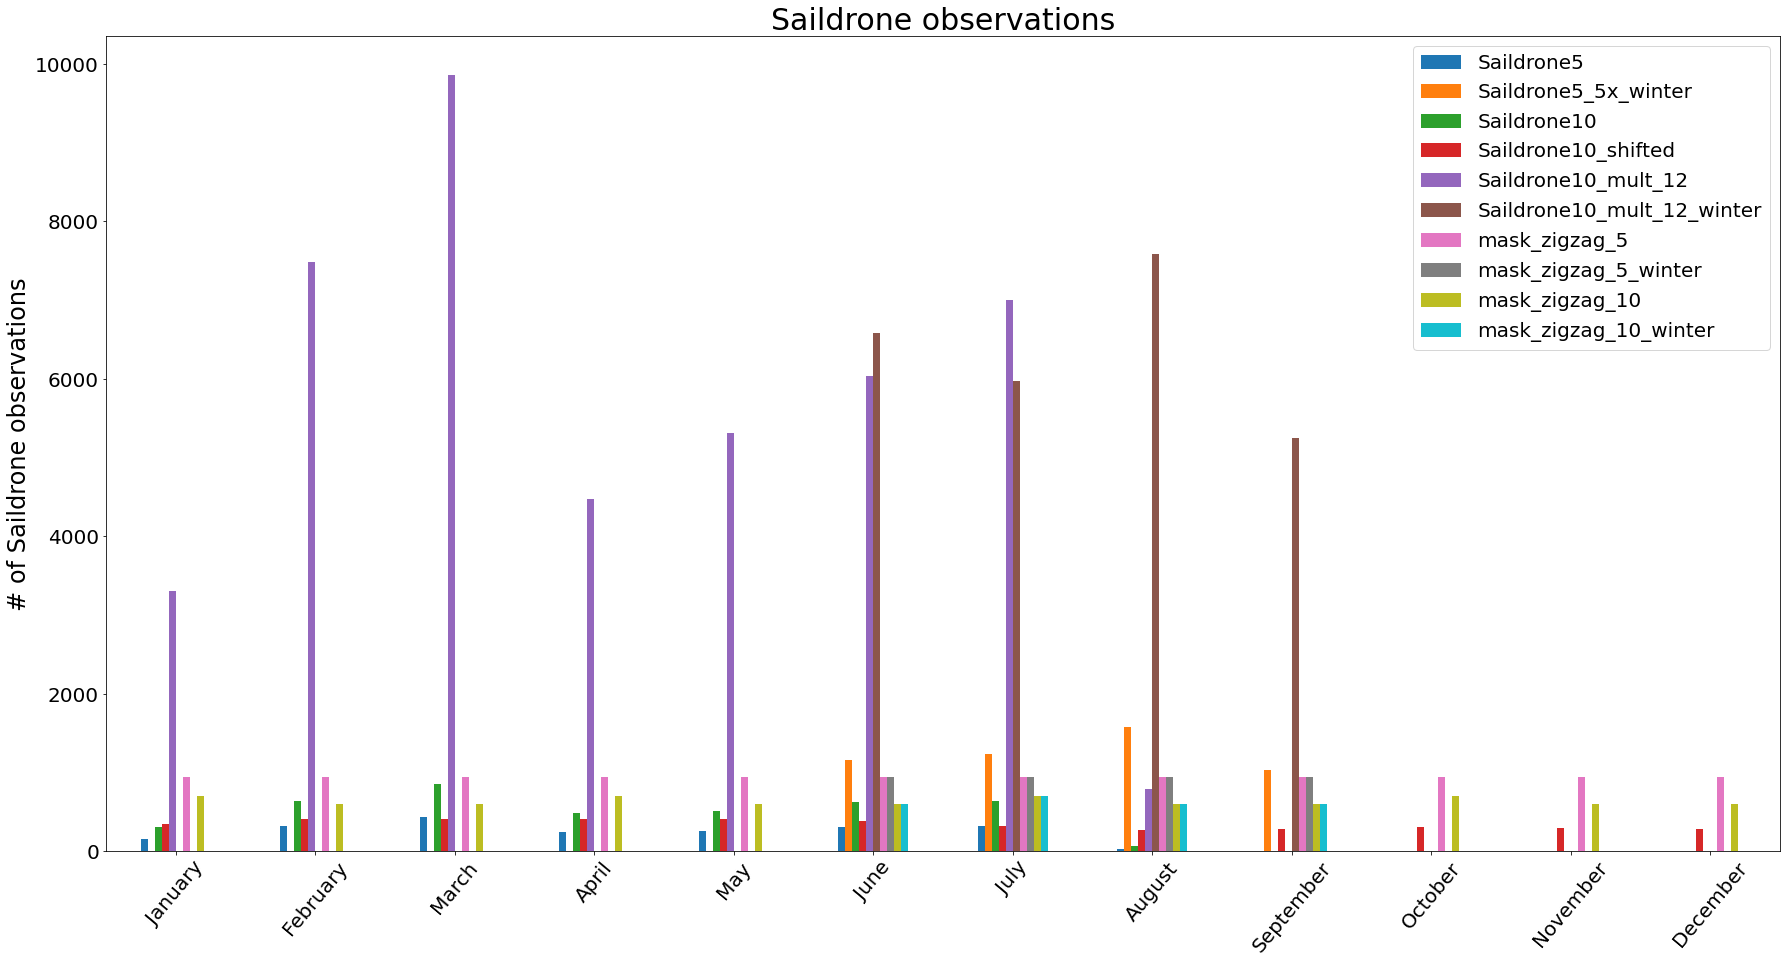

In [18]:
ax = df3_month.plot(kind='bar', figsize=(30,15), xlabel ="", ylabel ="# of Saildrone observations", title = "Saildrone observations")
#ax.set_xticks(df3.index)
ax.set_xticklabels(df3_month.Month, rotation=50)
ax.legend(fontsize= 20)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel("# of Saildrone observations", fontsize = 24);
ax.title.set_size(30);

### Combine SOCAT and USV tracks

In [2]:
ds_mask_ZZ = xr.open_dataset('/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_zigzag_10.nc')
ds_mask_one = xr.open_dataset("/data/artemis/workspace/theimdal/saildrone/mask/saildrone_mask_10.nc")

In [3]:
ds_socat = xr.open_dataset('/data/artemis/observations/SOCAT/originals/SOCATv2022_tracks_gridded_monthly.nc')

In [4]:
da = ds_socat['fco2_ave_unwtd'].sel(tmnth=slice('1982', '2016'))

In [5]:
da = da.to_dataset().rename({"tmnth": "time", "fco2_ave_unwtd": "fco2"})

In [6]:
socat_bool = (da['fco2']>0) # true if data exists false otherwise
socat_mask = socat_bool.where(socat_bool) # 1 if data exists nan otherwise

In [7]:
dates_socat_new = pd.date_range(start="1982-01-01T00:00:00.000000000",
                                end="2016-12-31T00:00:00.000000000",freq="MS")+np.timedelta64(14,'D')

In [8]:
socat_mask['time'] = dates_socat_new

In [12]:
lon1 = socat_mask.xlon
lon2 = np.where(lon1 <0, lon1+360, lon1)
socat_mask.coords['xlon'] = (lon2)
socat_mask = socat_mask.sortby(socat_mask.xlon)

In [14]:
test = xr.merge([ds_mask_ZZ.sail_mask, ds_mask_one.sail_mask, socat_mask])

In [16]:
test2 = xr.concat([ds_mask_ZZ.sail_mask, ds_mask_one.sail_mask, socat_mask], dim='time')

In [18]:
df = test2.to_dataframe()

In [19]:
dup = df.groupby(level=df.index.names).mean()

In [21]:
sail_usv_socat = dup.to_xarray()

In [23]:
ds_mask = sail_usv_socat
nmonths = ds_mask.sail_mask.loc['1982-01':'2016-12'].sum(dim='time')
nmonths = nmonths.where(nmonths>0)

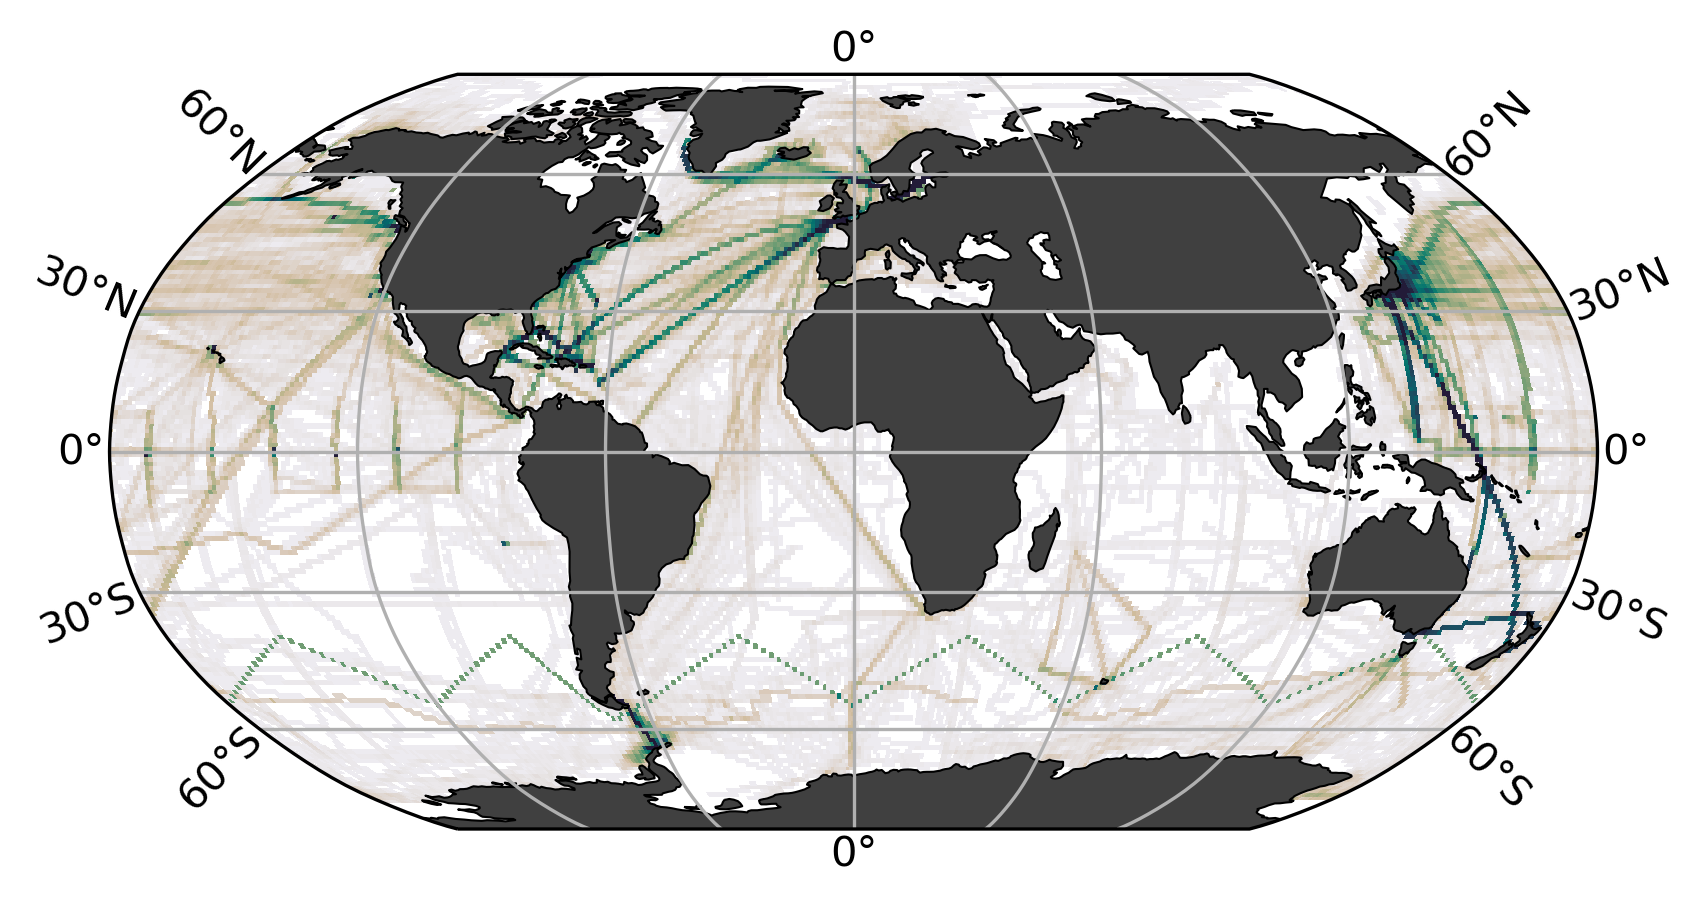

In [53]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=False,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    
    # Colorbar ranges
    vrange = [0, 100, 10]
    cmap = cm.cm.rain
    #cmap = cm.cm.oxy
    #cmap = cm.cm.solar
    data = xr_add_cyclic_point(nmonths, cyclic_coord='xlon')
    
    sub = worldmap.add_plot(lon=data['xlon'], lat=data['ylat'], data=data, 
                      vrange=vrange[0:2], cmap=cmap, ax=0, linewidth_coast=0.5)
    
    # add colorbar
    col = worldmap.add_colorbar(sub, ax=0)
    worldmap.set_cbar_xlabel(col, 'Number of months with data', fontsize=11)
    worldmap.set_ticks(col, vrange[0], vrange[1], vrange[2])
    col.ax.tick_params(labelsize=9)

    
    worldmap.grid[0].gridlines(draw_labels=True)
    
#fig.savefig("/home/theimdal/socat_USV_map.jpg",dpi=300, transparent=True)

In [3]:
ds_mask = mask_sail10_mult_12
nmonths = ds_mask.sail_mask.loc['1982-01':'2016-12'].sum(dim='time')
nmonths = nmonths.where(nmonths>0)

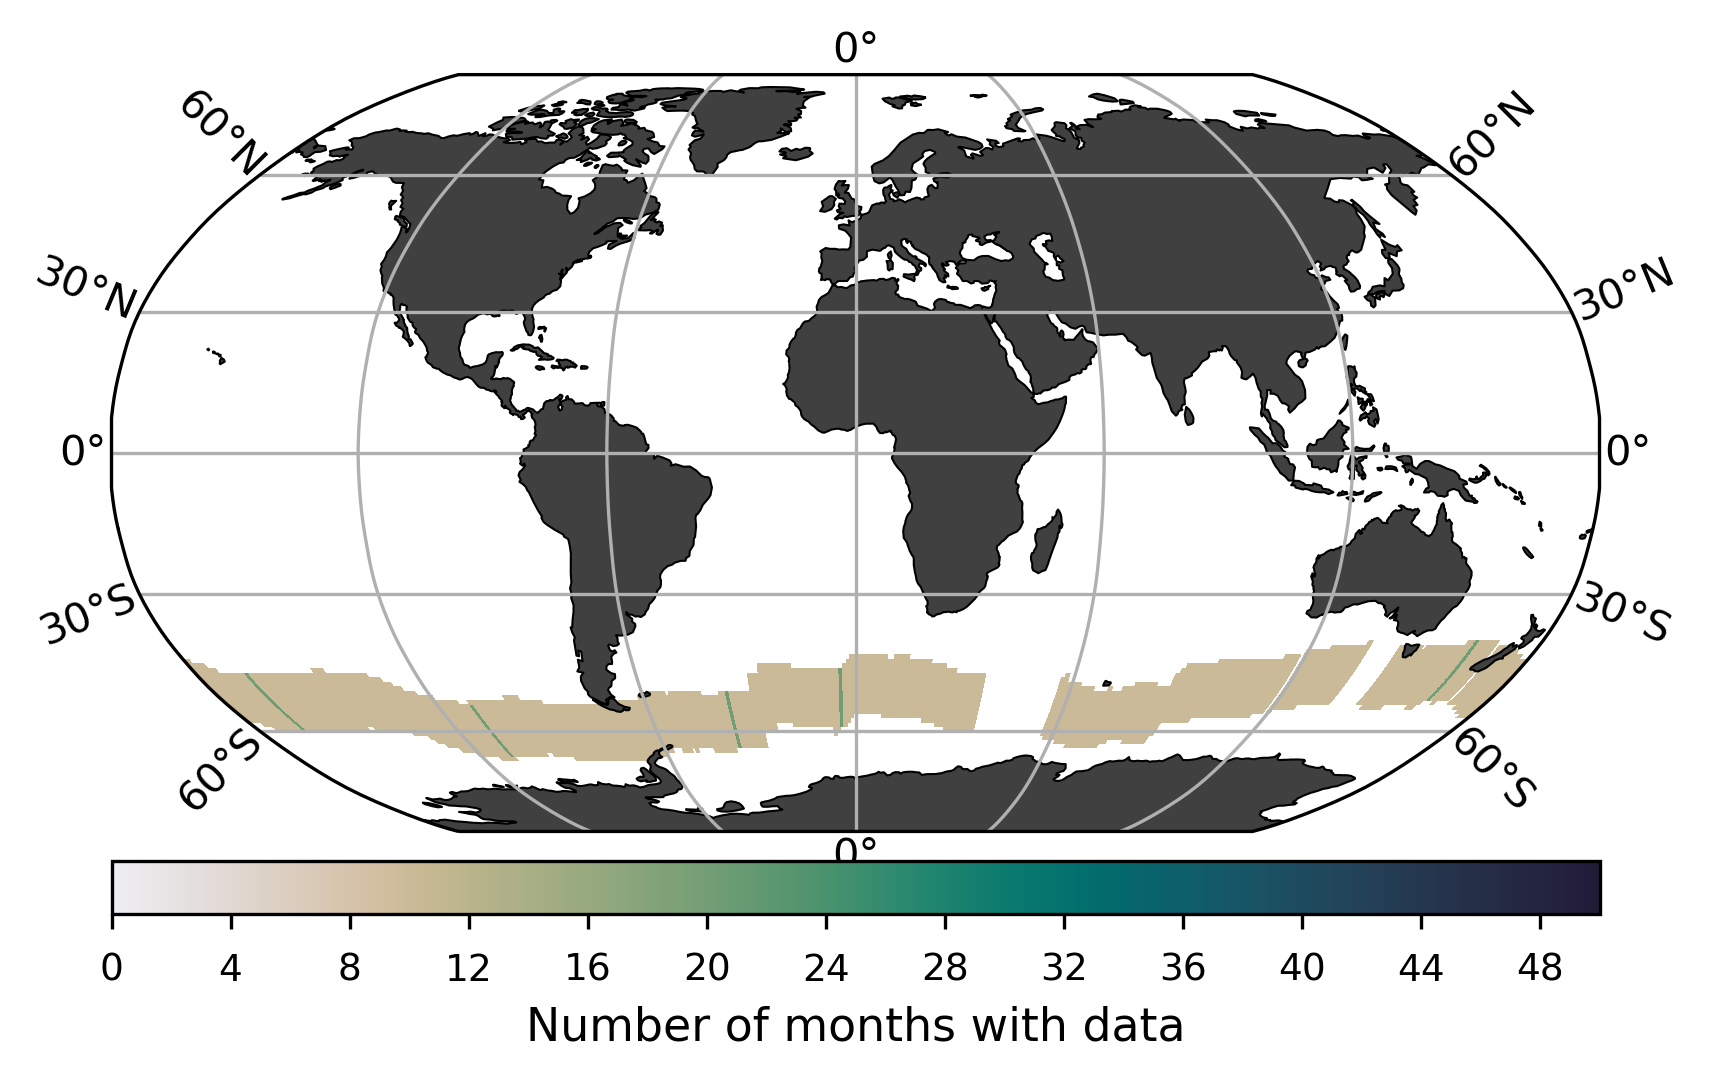

In [5]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    # Setup Figure
    fig = plt.figure(dpi=300) 
    worldmap = SpatialMap2(fig=fig, region='world', 
                   cbar_mode='each',
                   colorbar=True,
                   cbar_location='bottom',
                   nrows_ncols=[1,1])
    
    
    # Colorbar ranges
    vrange = [0, 50, 4]
    cmap = cm.cm.rain
    #cmap = cm.cm.oxy
    #cmap = cm.cm.solar
    data = xr_add_cyclic_point(nmonths, cyclic_coord='xlon')
    
    sub = worldmap.add_plot(lon=data['xlon'], lat=data['ylat'], data=data, 
                      vrange=vrange[0:2], cmap=cmap, ax=0, linewidth_coast=0.5)
    
    # add colorbar
    col = worldmap.add_colorbar(sub, ax=0)
    worldmap.set_cbar_xlabel(col, 'Number of months with data', fontsize=11)
    worldmap.set_ticks(col, vrange[0], vrange[1], vrange[2])
    col.ax.tick_params(labelsize=9)
    
    worldmap.grid[0].gridlines(draw_labels=True)
    
#fig.savefig("/home/theimdal/saildrone5_map.jpg",dpi=300)

## SOCAT observations

In [2]:
# Load SOCAT
dir_raw = '/local/data/artemis/observations'
ds_soc = xr.open_dataset(f'{dir_raw}/SOCAT/originals/SOCATv2019_tracks_gridded_monthly.nc')
ds_soc = ds_soc.rename({'xlon':'lon', 'ylat':'lat', 'tmnth':'time'})

# time range
date_range = ['1982-01', '2016-12']
ds_soc = ds_soc.sel(time=slice(f'{date_range[0]}',f'{date_range[1]}'))
ds_soc['time'] = pd.date_range(start=f'{date_range[0]}T00:00:00.000000000', 
                               end=f'{date_range[1]}T00:00:00.000000000',freq='MS')+ np.timedelta64(14, 'D')

# roll longitude
ds_soc = ds_soc.roll(lon=180, roll_coords='lon')
ds_soc['lon'] = np.arange(0.5,360,1)

In [3]:
# Number of months with obervations
nmonths = (ds_soc['fco2_ave_unwtd'] > 0).sum('time')
nmonths = nmonths.where(nmonths>0)

<Figure size 1920x1320 with 0 Axes>

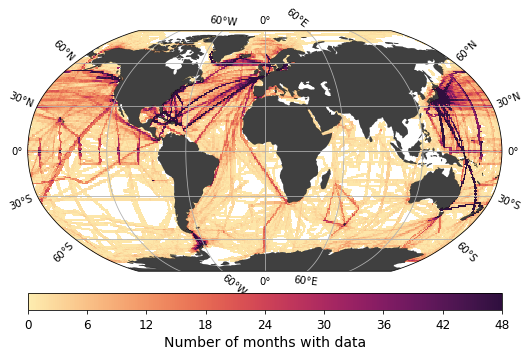

In [6]:
# colormap
vrange = [0, 48, 6]
cmap = cm.cm.matter

# data to plot
data = nmonths
data = xr_add_cyclic_point(data, cyclic_coord='lon') 

# make figure
with plt.style.context('seaborn-paper'):
    fig = plt.figure(dpi=300)
    dia = SpatialMap2(cbar_location='bottom', cbar_orientation='horizontal')
    sub = dia.add_plot(lat = data['lat'], 
                       lon = data['lon'], 
                       data = data, 
                       vrange=vrange[0:2], 
                       cmap=cmap, 
                       ax=0)
    col = dia.add_colorbar(sub, ax=0)
    col.ax.tick_params(labelsize=12)
    dia.set_cbar_xlabel(col, 'Number of months with data', fontsize=14)
    col.set_ticks(ticks=np.arange(vrange[0], vrange[1]+vrange[2], vrange[2]))
    #dia.set_title("SOCAT tracks", 0, loc="center", fontsize=18)
    
    dia.grid[0].gridlines(draw_labels=True)
    
#fig.savefig("/home/theimdal/SOCAT_map.jpg")
plt.savefig('/home/theimdal/SOCAT_map.png', dpi=300)

### Plot monthly observations for Sutton et al. (2021) sampling track

In [6]:
## Bring in Sutton et al. (2021) Saildrone track
sail = xr.open_dataset("/data/artemis/observations/Saildrone/data/processed/SailDrone_spco2_198201-201701.nc")

In [7]:
count2 = sail.sail_mask.sel(time=slice("2016","2016")).groupby('time.month').count().sum(['ylat','xlon'])

In [8]:
df3 = pd.DataFrame(count2, index=count2.month,columns=['Saildrone'])
df3.insert(1, "Month", ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], True)

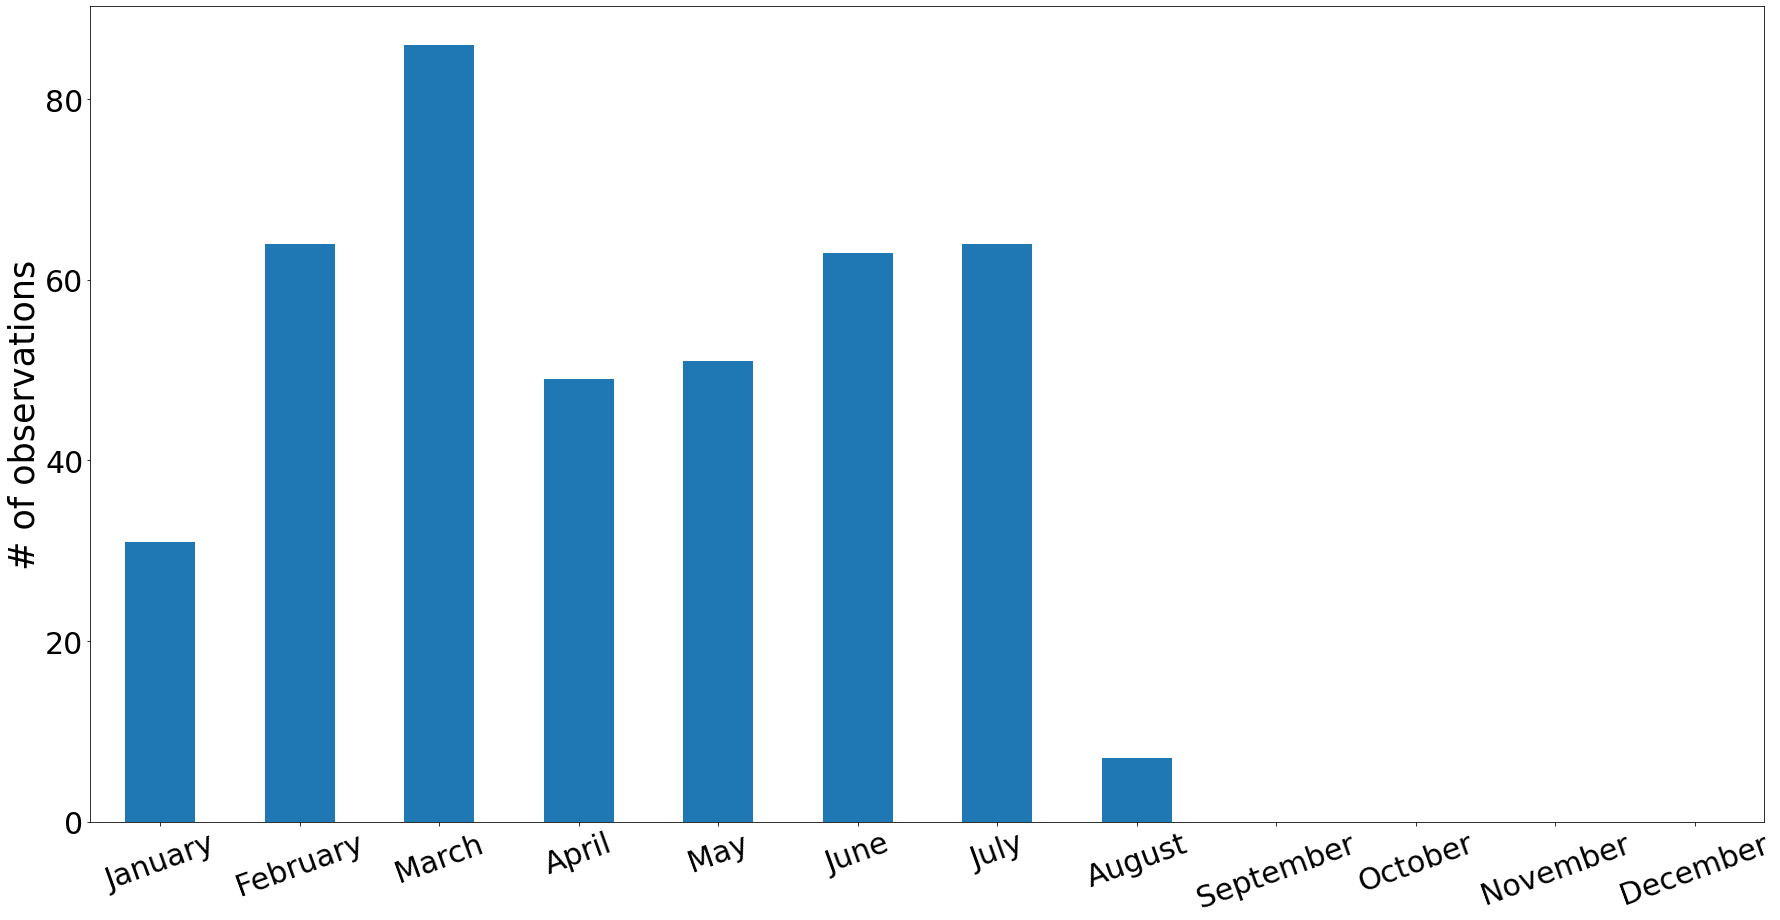

In [9]:
ax = df3.plot(kind='bar', figsize=(30,15), xlabel ="", legend="")

ax.set_xticklabels(df3.Month, rotation=20)
ax.tick_params(axis='both', labelsize=30)
ax.set_ylabel("# of observations", fontsize = 35);

#plt.savefig('/home/theimdal/Sail_bar.png', dpi=300)